# 5.3 画像データの処理

# 5.3.1 画像を扱う準備

In [1]:
from PIL import Image
sample = Image.open('data/tiger.png')

In [2]:
type(sample)

PIL.PngImagePlugin.PngImageFile

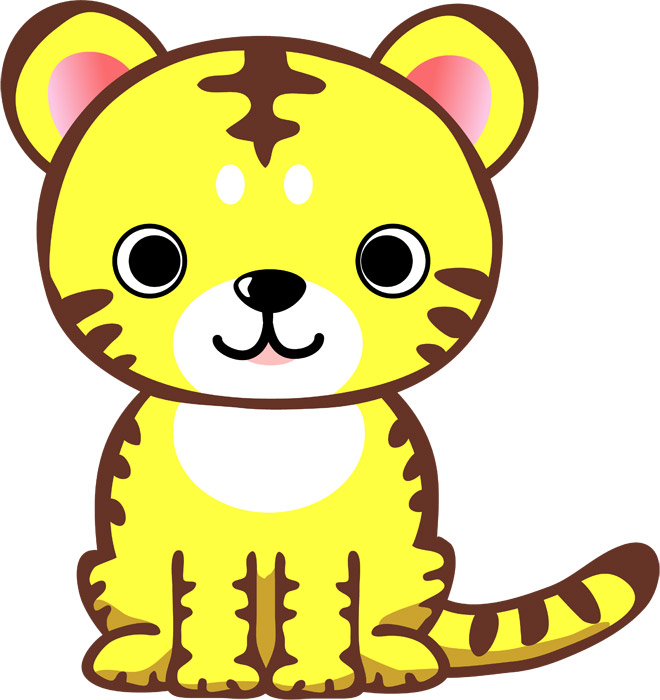

In [3]:
%matplotlib inline
sample

# 5.3.2 画像データの基本

In [4]:
sample.size

(660, 700)

In [5]:
print(sample.format)
print(sample.mode)

PNG
RGBA


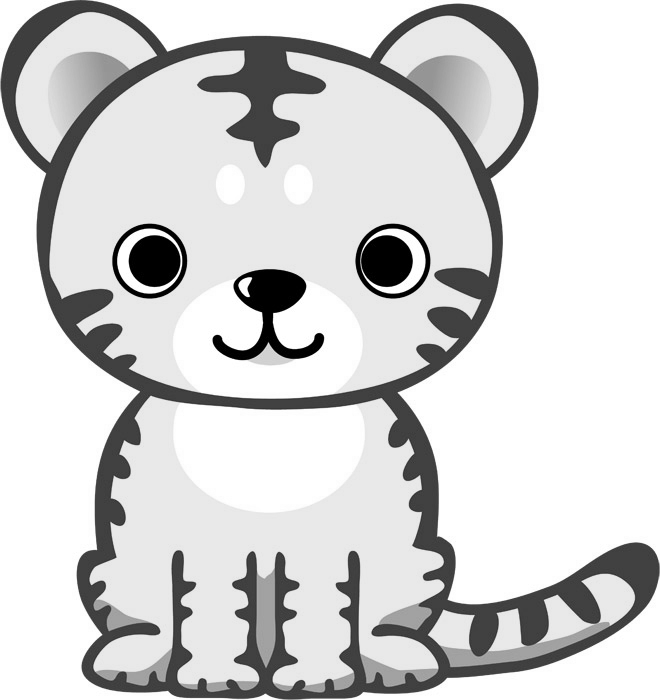

In [6]:
sample.convert('L')

In [7]:
sample.show()

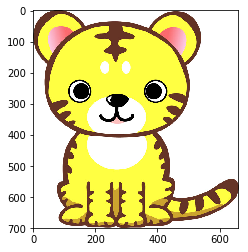

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# imshowメソッドを使って画像を表示します。
ax.imshow(sample)
plt.show()

# 5.3.3 簡単な画像の処理

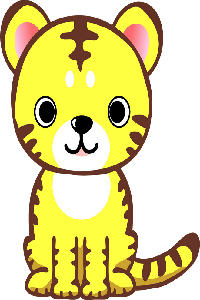

In [9]:
sample.resize(size=(200, 300))

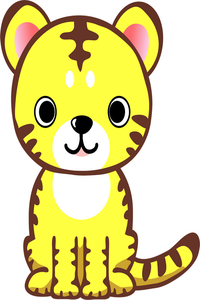

In [10]:
sample.resize(size=(200, 300), resample=Image.LANCZOS)

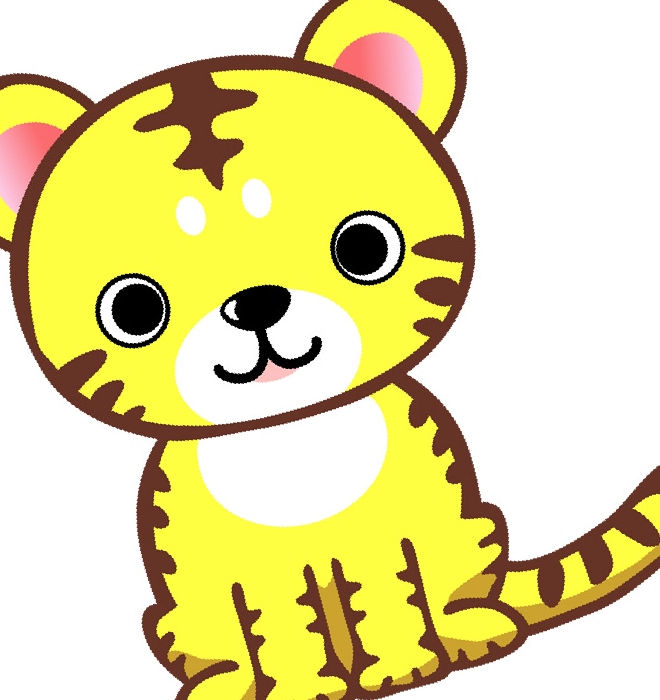

In [11]:
sample.rotate(15)

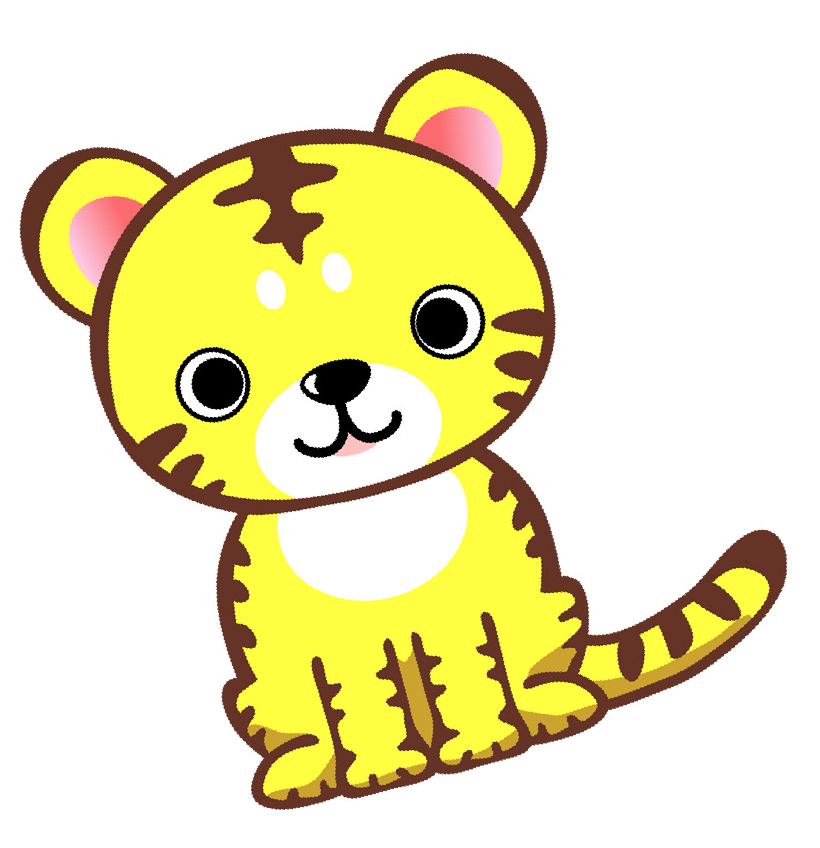

In [12]:
sample.rotate(15, expand=True)

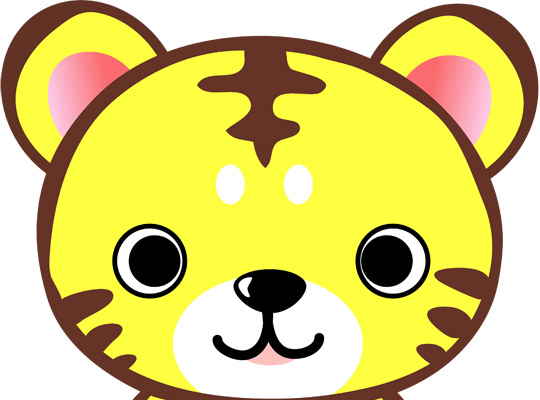

In [13]:
sample.crop((0, 0, 540, 400))

In [14]:
crop_img = sample.crop((0, 0, 540, 400))
crop_img.save('crop_img.png')

# 5.3.4 数値データとしての画像

In [15]:
import numpy as np
num_img = np.array(sample)

In [16]:
num_img.shape

(700, 660, 4)

In [17]:
num_img[0, 0]

array([255, 255, 255, 255], dtype=uint8)

In [18]:
num_img[100, 100]

array([ 99,  50,  36, 255], dtype=uint8)

# 5.3.5 機械学習を使った画像の分類

In [19]:
from pathlib import Path
p = Path('data/shapes')
circles = list(p.glob('circle/*.png'))
circles[:10]

[PosixPath('data/shapes/circle/225.png'),
 PosixPath('data/shapes/circle/1969.png'),
 PosixPath('data/shapes/circle/543.png'),
 PosixPath('data/shapes/circle/2051.png'),
 PosixPath('data/shapes/circle/1558.png'),
 PosixPath('data/shapes/circle/972.png'),
 PosixPath('data/shapes/circle/2737.png'),
 PosixPath('data/shapes/circle/3429.png'),
 PosixPath('data/shapes/circle/2723.png'),
 PosixPath('data/shapes/circle/966.png')]

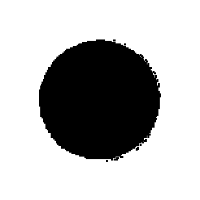

In [20]:
sample = Image.open(circles[0])
sample

In [21]:
sample.size

(200, 200)

In [22]:
np.array(sample)[0, 0]

255

In [23]:
cls_dic = {'circle': 0, 'square': 1, 'star':2, 'triangle': 3}

In [24]:
X = []
y = []
for name, cls in cls_dic.items():
    child = p / name
    for img in child.glob('*.png'):
        X.append(np.array(Image.open(img)).flatten())
        y.append(cls)

In [25]:
len(X)

14970

In [26]:
len(X[0])

40000

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=123)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=123)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [29]:
pred = rf_clf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      3534
          1       0.99      1.00      0.99      3578
          2       0.99      1.00      1.00      3580
          3       1.00      0.99      0.99      3530

avg / total       0.99      0.99      0.99     14222

